# Solve cart pole problem using Advantage Actor Critic (A2C) algorithm

Best hyperparameters from  SB3 RL Zoo:

**OrderedDict([('ent_coef', 0.0),
             ('n_envs', 8),
             ('n_timesteps', 500000.0),
             ('policy', 'MlpPolicy'),
             ('normalize', False)])**

## Installing dependendencies and import packages
stable-baseline is a deep reinforcement learning library, it contains A2C implementation

In [1]:
## screen render things and gym
%%capture
!apt install ffmpeg
!pip3 install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1


# library for reinforcement learning
!pip install stable-baselines3[extra]


In [2]:
import os
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

import gym


from stable_baselines3 import A2C
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines3.common.env_util import make_vec_env

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


## Looking at the environment

In [3]:
# Create the env
env_id = "CartPole-v1"

# Create the env
env = gym.make(env_id)

# Get the state space and action space
s_size = env.observation_space.shape
a_size = env.action_space

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


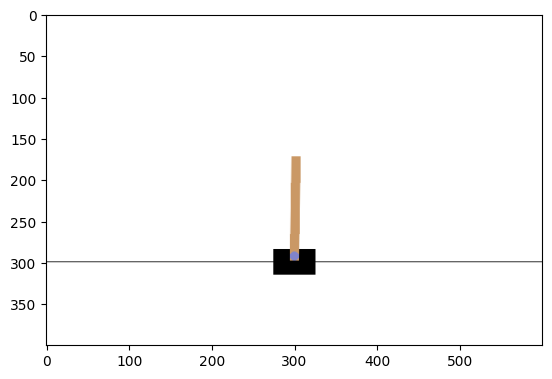

In [42]:
# let's check if render() works correctly
env.reset()
screen = env.render(mode='rgb_array')
plt.imshow(screen)
ipythondisplay.clear_output(wait=True)


## Normalize observations and rewards
A good practice in reinforcement learning is to normalize input features.

For that purpose, there is a wrapper that will compute a running average and standard deviation of input features. We also normalize rewards with this same wrapper by adding norm_reward = True



In [21]:
#make parallel environment
env = make_vec_env(env_id, n_envs=4) # n_env is the number of processes to use

# Adding this wrapper to normalize the observation and the reward
env = VecNormalize(env, norm_obs=True, norm_reward=True, clip_obs=10.)

*Documentation for the functions I don't know*

Vectorized Environments are a method for stacking multiple independent environments into a single environment. Instead of training an RL agent on 1 environment per step, it allows us to train it on `n` environments per step. Because of this, `actions` passed to the environment are now a vector (of dimension `n`). It is the same for `observations`,`rewards` and end of episode signals (`dones`).

## Create A2C model
Choosing for policy "MlpPolicy", that is one of the possible implementation of policy network, so it covers features extraction and the NN (in this case Actor NN and Critic NN)

In [32]:
model = A2C(policy = "MlpPolicy",
            env = env,
            verbose=1, ent_coef = 0, learning_rate= 0.0007, gamma= 0.95)

Using cuda device


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Train the agent
Let's train our agent for 500 timesteps. Saving the statistics afterward.

In [33]:
# Train the agent and display a progress bar
model.learn(total_timesteps=500000.0, progress_bar=True)
# Save the model and  VecNormalize statistics when saving the agent
model.save("a2c-CartPole-v1")
env.save("vec_normalize.pkl")

Output()

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 43.8     |
|    ep_rew_mean        | 43.8     |
| time/                 |          |
|    fps                | 1426     |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -0.509   |
|    explained_variance | 0.0648   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.012    |
|    value_loss         | 0.0056   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 65.1     |
|    ep_rew_mean        | 65.1     |
| time/                 |          |
|    fps                | 1429     |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 4000     |
| train/                |          |
|

## Evaluate the agent
Now that's our  agent is trained, we need to check its performance;Stable-Baselines3 provides a method to do that: `evaluate_policy`

In [34]:
# Load the saved statistics
eval_env = DummyVecEnv([lambda: gym.make("CartPole-v1")])
#returns the environment I want to evaluate
eval_env = VecNormalize.load("vec_normalize.pkl", eval_env)

# We need to override the render_mode
eval_env.render_mode = "rgb_array"

#  do not update them at test time
eval_env.training = False
# reward normalization is not needed at test time
eval_env.norm_reward = False

# Load the agent
model = A2C.load("a2c-CartPole-v1")
#actual evaluation
mean_reward, std_reward = evaluate_policy(model = model, env = env, n_eval_episodes=1)

print(f"Mean reward = {mean_reward:.2f} +/- {std_reward:.2f}")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Mean reward = 500.00 +/- 0.00


## Display the results

KeyboardInterrupt: ignored

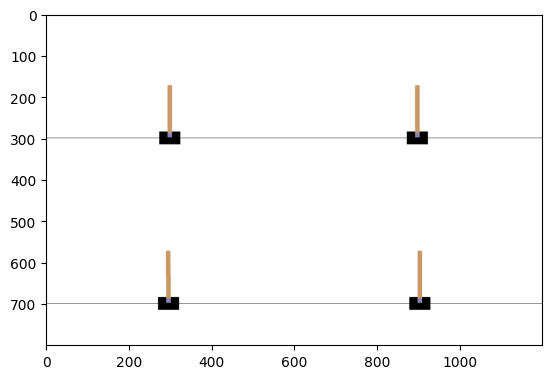

In [35]:
obs = env.reset()
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    screen = env.render(mode='rgb_array')
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

ipythondisplay.clear_output(wait=True)
env.close()